In [1]:
import pandas as pd 
import numpy as np 

from scipy import stats 
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pizza_tutorial.csv')
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-225,1997,11.6,0.69,0.34,...,0.43,3.28,1.12,6.12,6.72,0.78,0.17,0.86,1.47,0.00
2,3,Che Adams\Che-Adams,sco SCO,FW,Southampton,24-306,1996,28.1,1.03,0.57,...,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-132,1987,3.0,0.00,0.00,...,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33


In [3]:
df['Player'] = df['Player'].str.split('\\', expand=True)[0]
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'Tackles', 'Tkls Won', 'Tkls vs Dribbles', 'Dribbled Past',
       'Successful Pressures', 'Def 3rd Press', 'Mid 3rd Press',
       'Att 3rd Press', 'Blocks', 'Interceptions', 'Tkl+Int', 'Clearances',
       'Errors'],
      dtype='object')

In [4]:
df = df[(df['Pos'] == 'DF') & (df['90s'] >= 15)]
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
6,7,Ola Aina,ng NGA,DF,Fulham,24-219,1996,28.9,1.63,0.87,...,0.80,2.11,4.74,3.11,0.76,1.56,1.76,3.39,4.19,0.00
8,9,Semi Ajayi,ng NGA,DF,West Brom,27-187,1993,27.9,2.04,1.47,...,0.54,4.48,7.46,3.33,0.57,1.90,1.25,3.30,4.70,0.07
12,13,Toby Alderweireld,be BEL,DF,Tottenham,32-074,1989,21.9,1.55,0.73,...,0.50,2.97,5.16,3.06,0.14,1.96,0.46,2.01,6.80,0.00


In [5]:
cleaned_df = df.drop(['Rk', 'Nation', 'Pos', 'Squad', 'Age', 'Born'], axis=1).reset_index()
cleaned_df.head()

,index,Player,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,0,Patrick van Aanholt,19.7,1.62,0.96,0.71,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,3,Tosin Adarabioyo,29.8,1.28,0.77,0.57,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
2,6,Ola Aina,28.9,1.63,0.87,0.59,0.80,2.11,4.74,3.11,0.76,1.56,1.76,3.39,4.19,0.00
3,8,Semi Ajayi,27.9,2.04,1.47,0.65,0.54,4.48,7.46,3.33,0.57,1.90,1.25,3.30,4.70,0.07
4,12,Toby Alderweireld,21.9,1.55,0.73,0.59,0.50,2.97,5.16,3.06,0.14,1.96,0.46,2.01,6.80,0.00


In [6]:
# isolate a player for analysis
player_name = 'Thiago Silva'
player = cleaned_df.loc[cleaned_df['Player'] == player_name].reset_index()
player = list(player.loc[0])
player = player[3:]
params = list(cleaned_df.columns)[2:]
assert len(params) == len(player), "Params not initialized correctly"

# find percentiles for each stat for selected player
values = np.zeros(len(params))
for x in range(len(params)):
    values[x] = math.floor(stats.percentileofscore(cleaned_df[params[x]], player[x]))

values

array([20., 24., 21., 34., 17.,  5.,  1., 27., 12.,  9., 50., 29., 63.,
       66.])

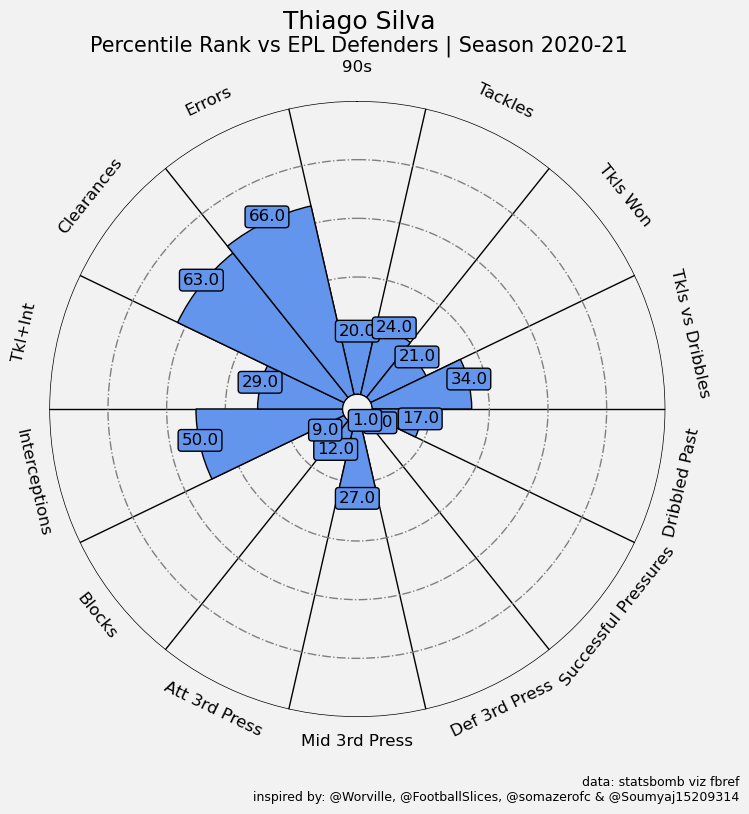

In [7]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, f"{player_name}", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs EPL Defenders | Season 2020-21",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    ha="right"
)

plt.show()